### 상관분석

### 병아리의 성장에 영향을 주는 요소는?

In [ ]:
# 상관분석이란?
## 상관분석(Correlation Analysis)은 연속형인 두 변수 간에 어떤 선형적인(linear) 또는 비선형적인(non-linear) 관계를 갖고 있는지 분석하는 방법.
## 상관분석을 실시하면 두 변수 간의 관계를 상관계수(Correlation Coefficient)로 나타냄.
## 관계수는 -1 ~ 1 사이의 값을 가지며 (－)부호일 경우 반비례 관계인 음의 상관관계를 나타내고, (+)부호일 경우 비례 관계인 양의 상관관계를 나타냄.

In [2]:
import pandas as pd
w = pd.read_csv('data/chick004.csv')
w.head()

,chick_nm,weight,egg_weight,movement,food
0,a01,140,65,146,14
1,a02,128,62,153,12
2,a03,140,65,118,13
3,a04,135,65,157,13
4,a05,145,69,157,13


In [3]:
w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   chick_nm    30 non-null     object
 1   weight      30 non-null     int64 
 2   egg_weight  30 non-null     int64 
 3   movement    30 non-null     int64 
 4   food        30 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


In [5]:
w2 = w.iloc[:,1:5]
w2.head()

,weight,egg_weight,movement,food
0,140,65,146,14
1,128,62,153,12
2,140,65,118,13
3,135,65,157,13
4,145,69,157,13


In [6]:
w_cor = w2.corr(method='pearson')
w_cor

,weight,egg_weight,movement,food
weight,1.000000,0.957169,0.380719,0.877574
egg_weight,0.957169,1.000000,0.428246,0.808147
movement,0.380719,0.428246,1.000000,0.319011
food,0.877574,0.808147,0.319011,1.000000


### 시각화

In [7]:
import matplotlib.pyplot as plt

plt.rc('font', family='malgun gothic')
plt.rcParams['axes.unicode_minus'] = False

import seaborn as sns

C:\Users\JBEDU30\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\JBEDU30\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


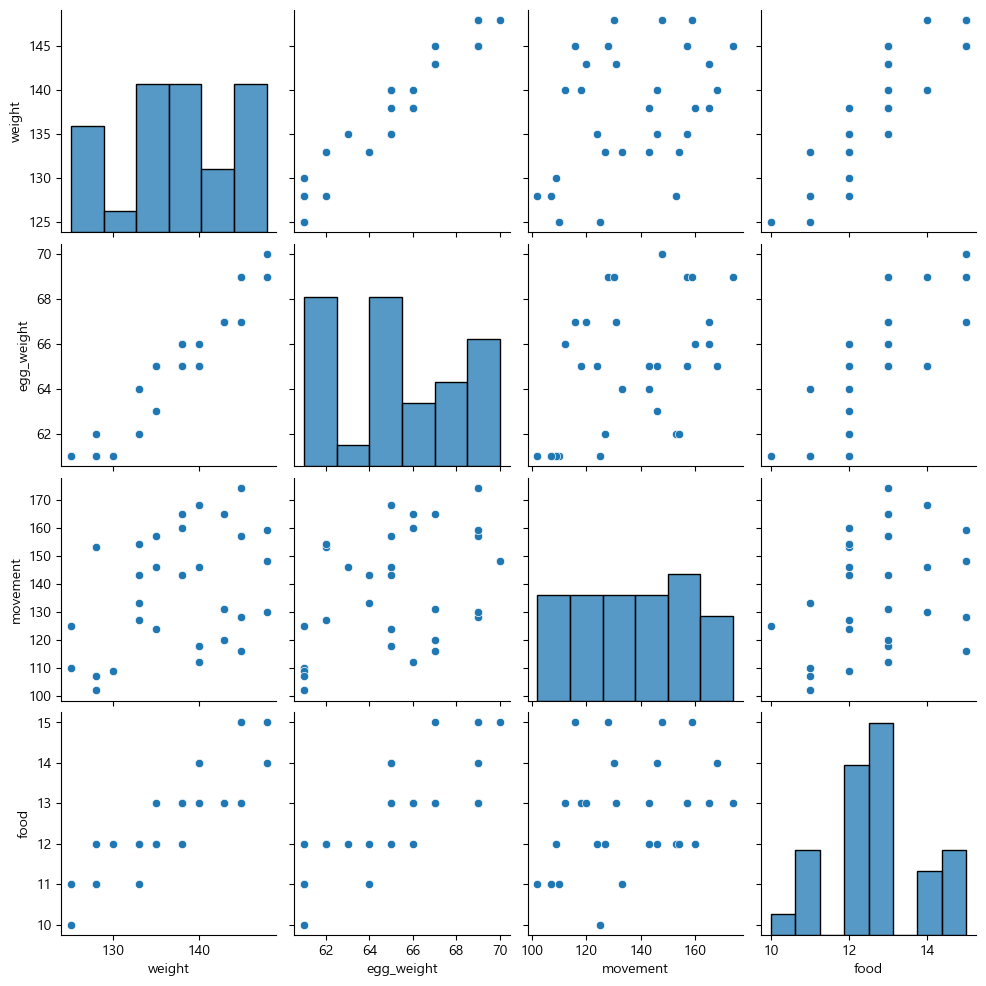

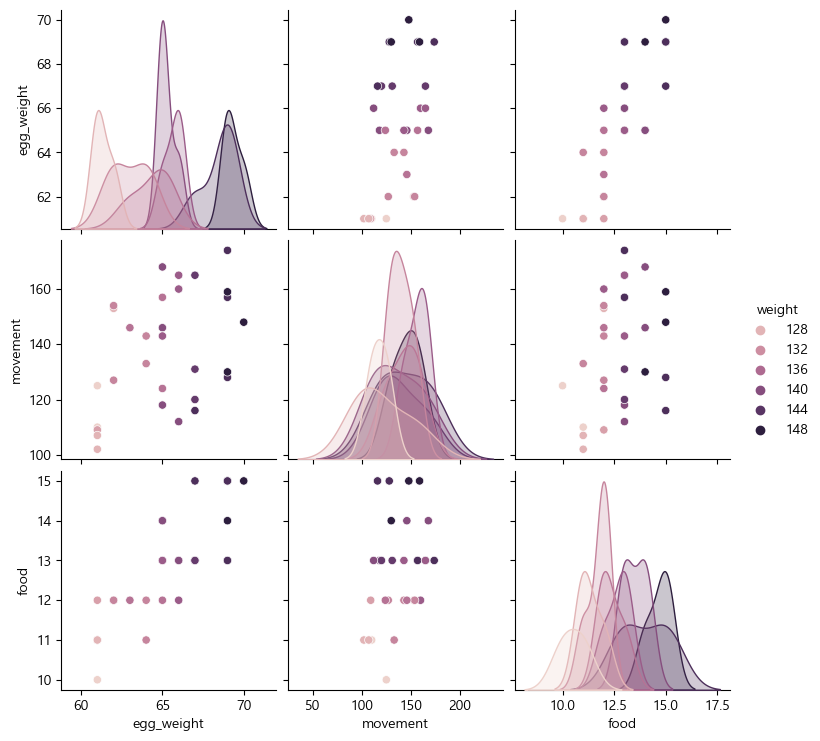

In [10]:
#산점도 그리기
sns.pairplot(w2)
sns.pairplot(w2, hue='weight')

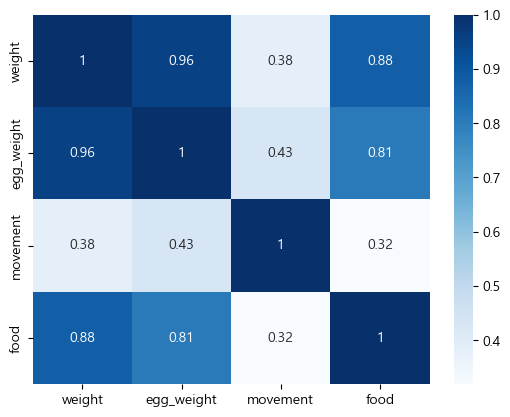

In [12]:
##히트맵 그리기

sns.heatmap(w_cor, annot = True, cmap = 'Blues', cbar = True ) # annot:수치표시, cbar; 색싱믹대
plt.show()

## 회귀 분석

In [ ]:
### 병아리의 무게 예측 ( 알의 무게로 병아리 무게 예측)
### 회귀분석이란?
### 회귀분석(Regression analysis)은 연속형 변수들에 대해 두 변수 사이의 관계를 
#수식으로 나타내는 분석 방법. 
### 쉽게 말해서 x라는 독립변수와 y라는 종속변수 (독립변수 변화에 따른 변화)가 존재할 때 
#이 두 변수 사이의 관계를 y = ax + b와 같은 형태의 수식으로 나타낼 수 있는 방법.

In [ ]:
### 단순 선형 회귀 분석

In [24]:
import statsmodels.formula.api as smf

In [25]:
# 모델구축
model_lm = smf.ols(formula = 'weight ~ egg_weight', data = w2)

In [26]:
# 모델 학습
result_lm = model_lm.fit()

In [27]:
# 모델 결과 확인
result_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     306.0
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           1.32e-16
Time:                        19:38:22   Log-Likelihood:                -63.148
No. Observations:                  30   AIC:                             130.3
Df Residuals:                      28   BIC:                             133.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -14.5475      8.705     -1.671      0.106     -32.380       3.285
egg_weight     2.3371      0.134     17.493      0.000       2.063       2.611
==============================================================================
Omnibus:                       15.078   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                2.750
Skew:                           0.032   Prob(JB):                        0.253
Kurtosis:                       1.518   Cond. No.                     1.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

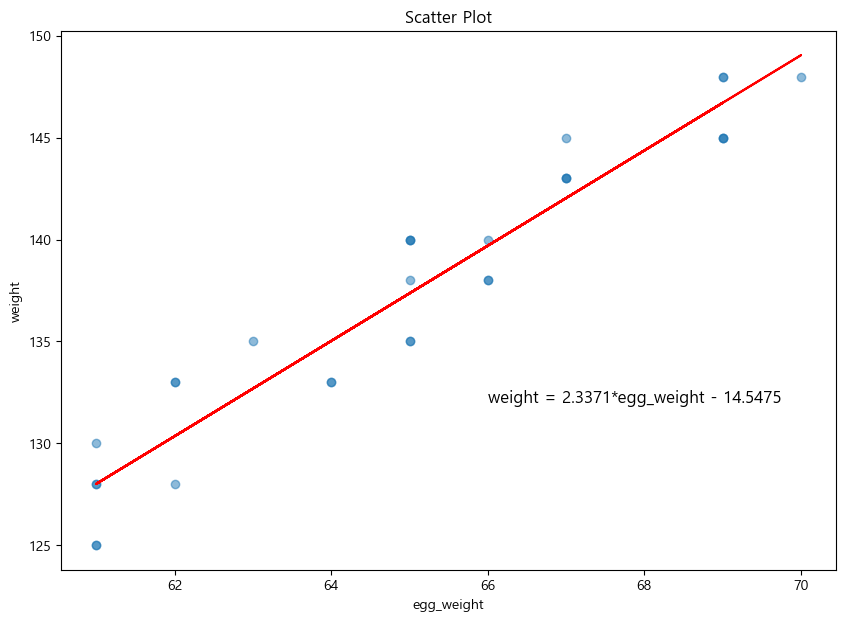

In [38]:
plt.figure(figsize=(10,7))
plt.scatter(w.egg_weight, w.weight, alpha =.5)
plt.plot(w.egg_weight, w.egg_weight*2.3371 - 14.5475, color = 'red')
plt.text(66, 132, 'weight = 2.3371*egg_weight - 14.5475', fontsize = 12)
plt.title('Scatter Plot')
plt.xlabel('egg_weight')
plt.ylabel('weight')
plt.show()

In [ ]:
## 다중 회귀 분석

In [40]:
model_mlm = smf.ols(formula = 'weight ~ egg_weight+food+movement', data = w2)

result_mlm = model_mlm.fit()
result_mlm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     157.7
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           8.46e-17
Time:                        20:19:12   Log-Likelihood:                -56.008
No. Observations:                  30   AIC:                             120.0
Df Residuals:                      26   BIC:                             125.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9748      8.587      0.346      0.732     -14.676      20.626
egg_weight     1.7763      0.195      9.117      0.000       1.376       2.177
food           1.5847      0.405      3.915      0.001       0.753       2.417
movement      -0.0087      0.017     -0.522      0.606      -0.043       0.026
==============================================================================
Omnibus:                        1.993   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.369   Jarque-Bera (JB):                1.746
Skew:                          -0.480   Prob(JB):                        0.418
Kurtosis:                       2.311   Cond. No.                     4.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
## movement 는 무 의미 함 (p-value>0.05)

model_mlm = smf.ols(formula = 'weight ~ egg_weight+food', data = w2)

result_mlm = model_mlm.fit()
result_mlm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     243.0
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           5.44e-18
Time:                        20:25:12   Log-Likelihood:                -56.164
No. Observations:                  30   AIC:                             118.3
Df Residuals:                      27   BIC:                             122.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6638      8.370      0.438      0.665     -13.510      20.837
egg_weight     1.7453      0.183      9.536      0.000       1.370       2.121
food           1.5955      0.399      4.001      0.000       0.777       2.414
==============================================================================
Omnibus:                        2.302   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.316   Jarque-Bera (JB):                1.940
Skew:                          -0.502   Prob(JB):                        0.379
Kurtosis:                       2.263   Cond. No.                     1.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
import pandas as pd
w3 = pd.read_csv('data/chick005.csv')
w3.head()

,day,weight
0,1,43
1,2,55
2,3,69
3,4,86
4,5,104


In [43]:
w3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   day     70 non-null     int64
 1   weight  70 non-null     int64
dtypes: int64(2)
memory usage: 1.2 KB


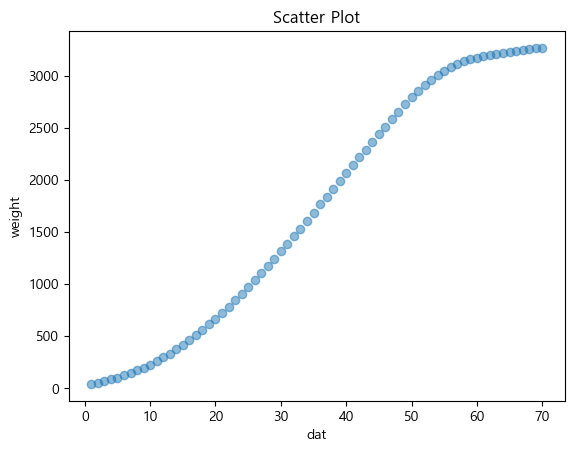

In [44]:
# 성장 기간에 따른 무게 변화

plt.scatter(w3.day, w3.weight, alpha = .5)
plt.title('Scatter Plot')
plt.xlabel('dat')
plt.ylabel('weight')
plt.show()

In [48]:
model_lm3 = smf.ols(formula = 'weight ~ day', data = w3)
result_lm3 = model_lm3.fit()
result_lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     3189.
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           7.22e-59
Time:                        20:43:26   Log-Likelihood:                -457.86
No. Observations:                  70   AIC:                             919.7
Df Residuals:                      68   BIC:                             924.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -295.8671     41.102     -7.198      0.000    -377.885    -213.850
day           56.8216      1.006     56.470      0.000      54.814      58.830
==============================================================================
Omnibus:                        3.866   Durbin-Watson:                   0.025
Prob(Omnibus):                  0.145   Jarque-Bera (JB):                2.079
Skew:                          -0.133   Prob(JB):                        0.354
Kurtosis:                       2.199   Cond. No.                         82.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

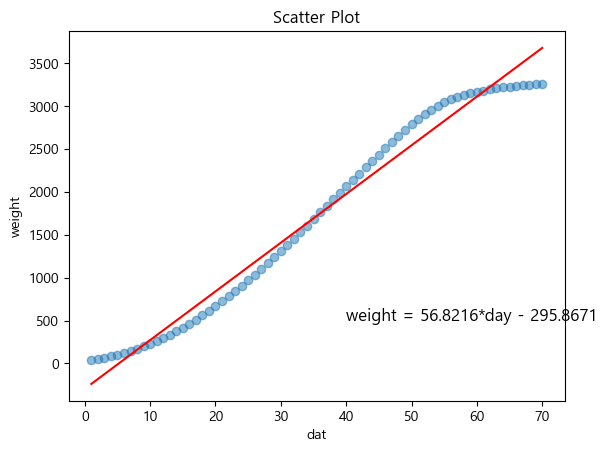

In [50]:
plt.scatter(w3.day, w3.weight, alpha = .5)

plt.plot(w3.day,w3.day*56.8216 - 295.8671, color = 'red')
plt.text(40,500, 'weight = 56.8216*day - 295.8671', fontsize = 12)

plt.title('Scatter Plot')
plt.xlabel('dat')
plt.ylabel('weight')
plt.show()

In [51]:
# 비선형 회귀 분석 ( 2개의 곡선 : 3차 함수 Graph 이용 )

model_nlm = smf.ols(formula = 'weight ~ I(day**3)+I(day**2)+day', data = w3)
result_nlm = model_nlm.fit()
result_nlm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.407e+04
Date:                Mon, 20 Nov 2023   Prob (F-statistic):          7.13e-109
Time:                        20:51:49   Log-Likelihood:                -327.17
No. Observations:                  70   AIC:                             662.3
Df Residuals:                      66   BIC:                             671.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     117.0141     13.476      8.683      0.000      90.108     143.920
I(day ** 3)    -0.0253      0.000    -51.312      0.000      -0.026      -0.024
I(day ** 2)     2.6241      0.053     49.314      0.000       2.518       2.730
day           -15.2978      1.632     -9.373      0.000     -18.557     -12.039
==============================================================================
Omnibus:                        6.702   Durbin-Watson:                   0.082
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                2.680
Skew:                           0.103   Prob(JB):                        0.262
Kurtosis:                       2.064   Cond. No.                     5.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

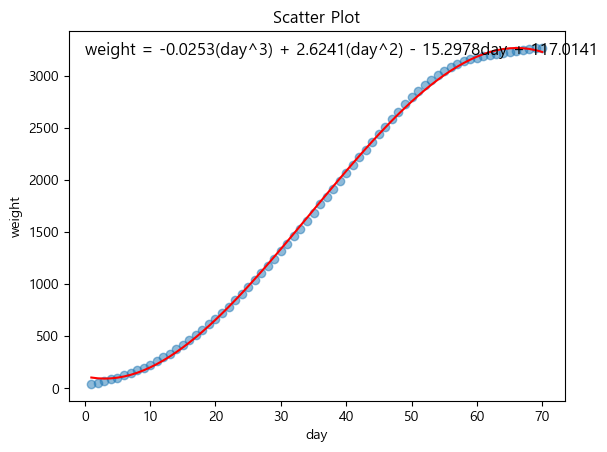

In [52]:
plt.scatter(w3.day, w3.weight, alpha = .5)
plt.plot(w3.day, (w3.day**3)*(-0.0253) + (w3.day**2)*2.6241 + w3.day*(-15.2978) + 117.0141, color = 'red')
plt.text(0, 3200, 'weight = -0.0253(day^3) + 2.6241(day^2) - 15.2978day + 117.0141', fontsize = 12)
plt.title('Scatter Plot')
plt.xlabel('day')
plt.ylabel('weight')
plt.show()

In [53]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.info()
iris.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
